In [1]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 561.4 kB/s eta 0:00:00


In [2]:
# Imports & Settings

# Suppress warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Import required libraries
import os  # For interacting with the operating system
from datetime import datetime  # For handling date and time
import pandas as pd  # For data manipulation and analysis
import pandas_datareader.data as web  # For accessing financial data from various sources
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import mplfinance as mpf  # For creating financial plots
import seaborn as sns  # For statistical data visualization

# Set the style for seaborn plots
sns.set_style('whitegrid')



In [4]:
from google.colab import drive
import json

# Mount Google Drive
drive.mount('/content/drive')

# Load API keys from a JSON file in Google Drive
with open('/content/drive/MyDrive/ML4T/api_keys.json', 'r') as f:
    api_keys = json.load(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Download html table with SP500 constituents

# URL of the Wikipedia page containing S&P 500 constituents
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Use pandas to read HTML tables from the Wikipedia page
# pd.read_html returns a list of all tables found on the page
# We select the first table (index 0) and specify that the first row is the header
sp500_constituents = pd.read_html(sp_url, header=0)[0]

# Display information about the DataFrame, including column names and data types
sp500_constituents.info()

# Display the first few rows of the DataFrame
sp500_constituents.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             503 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


[*********************100%%**********************]  1 of 1 completed


Yahoo Finance Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2404 entries, 2014-01-02 to 2023-07-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2404 non-null   float64
 1   High       2404 non-null   float64
 2   Low        2404 non-null   float64
 3   Close      2404 non-null   float64
 4   Adj Close  2404 non-null   float64
 5   Volume     2404 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 131.5 KB

First few rows of Yahoo Finance Data:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2014-01-02  54.830002  55.220001  54.189999  54.709999  54.597805  43195500
2014-01-03  55.020000  55.650002  54.529999  54.560001  54.448116  38246200
2014-01-06  54.419998  57.259998  54.049999  57.200001  57.082699  68852600
2014-01-07  57.700001  58.549999  57.220001  57.919998  57.8

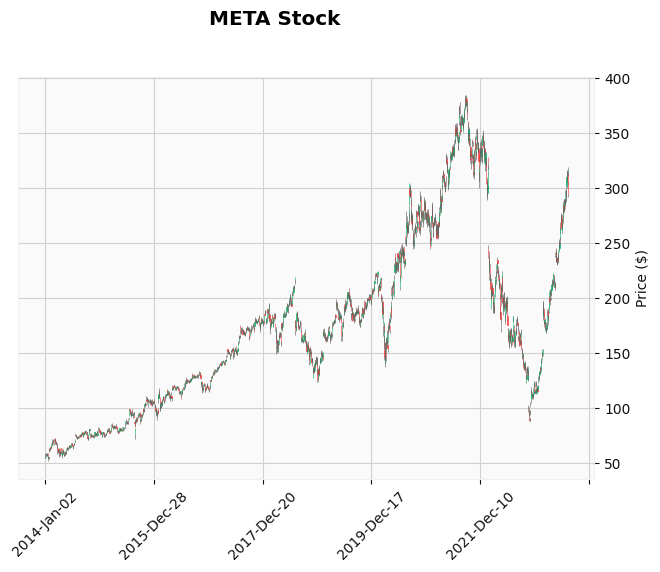

<Figure size 640x480 with 0 Axes>

In [6]:
# pandas-datareader for Market Data

import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas as pd

# Yahoo Finance Data
start = '2014-01-01'
end = '2023-07-23'  # Updated to a more recent date

# Download Meta (formerly Facebook) data using yfinance
try:
    yahoo = yf.download('META', start=start, end=end)

    if yahoo.empty:
        print("No data downloaded. The date range might be invalid.")
    else:
        print("Yahoo Finance Data Info:")
        yahoo.info()

        print("\nFirst few rows of Yahoo Finance Data:")
        print(yahoo.head())

        print("\nYahoo Finance Candlestick Chart:")
        mpf.plot(yahoo, type='candle', style='yahoo', title='META Stock', ylabel='Price ($)')
        plt.tight_layout()

except Exception as e:
    print(f"An error occurred: {e}")

    # If META fails, let's try a different stock as an example
    try:
        print("\nTrying with Apple (AAPL) stock instead:")
        yahoo = yf.download('AAPL', start=start, end=end)

        print("Yahoo Finance Data Info:")
        yahoo.info()

        print("\nFirst few rows of Yahoo Finance Data:")
        print(yahoo.head())

        print("\nYahoo Finance Candlestick Chart:")
        mpf.plot(yahoo, type='candle', style='yahoo', title='AAPL Stock', ylabel='Price ($)')
        plt.tight_layout()

    except Exception as e:
        print(f"An error occurred with AAPL as well: {e}")
        print("Please check your internet connection and try again later.")


## Update on IEX API and Alternatives

The IEX API, which was previously used in this notebook, is shutting down its free tier. As a result, we need to switch to an alternative data provider. Here are some popular options for financial data APIs:

1. **Alpha Vantage**: Offers free API access with some limitations. Provides stock data, forex, and cryptocurrencies.
2. **Finnhub**: Offers a free tier with limited API calls. Provides real-time and historical data for stocks, forex, and crypto.
3. **Polygon.io**: Offers a free tier for stock market data. Provides both historical and real-time data.
4. **Yahoo Finance API** (via yfinance): Not an official API, but widely used. Free to use, no API key required.
5. **Quandl**: Offers some free financial and economic datasets. Paid plans for more comprehensive data.
6. **Tiingo**: Offers a free plan with API access. Provides end-of-day stock prices and cryptocurrency data.

In the following sections, we'll use Alpha Vantage as an alternative to IEX. Note that you'll need to sign up for a free API key at https://www.alphavantage.co/.

In [7]:
# -----------------------------
# IEX (Investors Exchange) Data
# -----------------------------

IEX_API_KEY = os.getenv('IEX_API_KEY')

start = datetime(2015, 2, 9)

iex = web.DataReader('FB', 'iex', start, api_key=IEX_API_KEY)

print("IEX Data Info:")
iex.info()

print("\nLast Few Rows of IEX Data:")
print(iex.tail())

print("\nIEX Closing Price Plot:")
sns.set_style('whitegrid')
iex.close.plot(figsize=(14, 5))
sns.despine()

# -------------
# IEX Book Data
# -------------

book = web.get_iex_book('AAPL')

print("IEX Book Data Keys:")
print(list(book.keys()))

print("\nCombined Bid and Ask Orders:")
orders = pd.concat([pd.DataFrame(book[side]).assign(side=side) for side in ['bids', 'asks']])
print(orders.head())

print("\nDetailed Information for Each Key in the Order Book:")
for key in book.keys():
    try:
        print(f'\n{key}')
        print(pd.DataFrame(book[key]))
    except:
        print(book[key])

print("\nFirst Few Rows of Trade Data:")
print(pd.DataFrame(book['trades']).head())

ValueError: The IEX Cloud API key must be provided either through the api_key variable or through the  environment variable IEX_API_KEY

In [8]:
!pip install alpha_vantage

Alpha Vantage Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2127 entries, 2015-02-09 to 2023-07-21
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    2127 non-null   float64
 1   2. high    2127 non-null   float64
 2   3. low     2127 non-null   float64
 3   4. close   2127 non-null   float64
 4   5. volume  2127 non-null   float64
dtypes: float64(5)
memory usage: 99.7 KB

Last Few Rows of Alpha Vantage Data:
            1. open  2. high    3. low  4. close   5. volume
date                                                        
2023-07-17  307.540   311.71  304.7100    310.62  25323126.0
2023-07-18  310.875   314.20  307.6188    312.05  20764580.0
2023-07-19  313.030   318.68  310.5200    316.01  21763688.0
2023-07-20  313.500   315.54  302.2200    302.52  23836876.0
2023-07-21  304.570   305.46  291.2000    294.26  42139259.0

Meta (FB) Closing Price Plot:


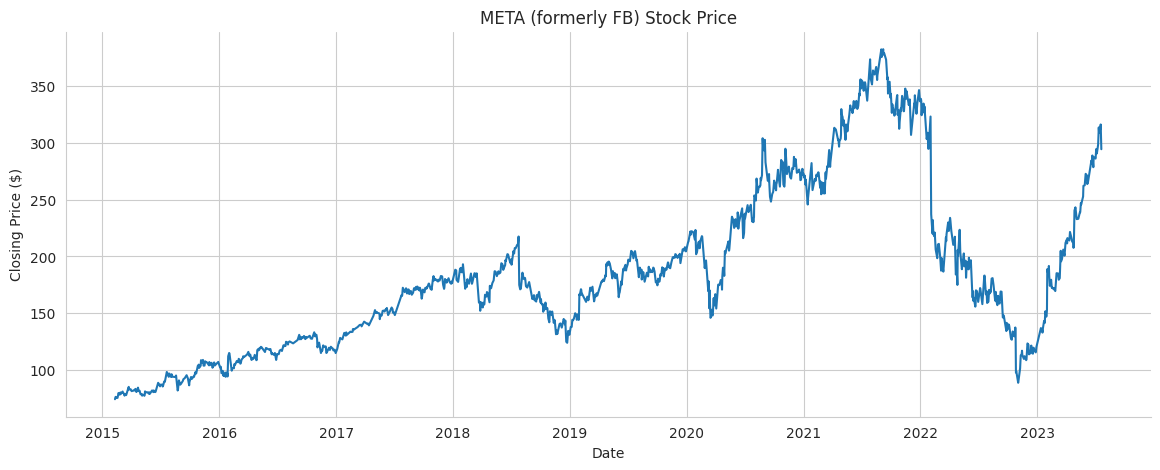


Alpha Vantage doesn't provide order book data. For such data, you might need to explore other APIs.


In [10]:
# Alpha Vantage API for Market Data

from alpha_vantage.timeseries import TimeSeries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Alpha Vantage API key
ALPHA_VANTAGE_API_KEY = api_keys['ALPHA_VANTAGE_API_KEY']

# Initialize the TimeSeries object
ts = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format='pandas')

try:
    # Download data for Meta (formerly Facebook)
    meta_df, meta_data = ts.get_daily('META', outputsize='full')

    # The index is already datetime, so we just need to sort it
    meta_df = meta_df.sort_index()

    # Filter the data to match the original date range
    start = pd.to_datetime('2015-02-09')
    end = pd.to_datetime('2023-07-23')  # Using current date as end date
    meta_df = meta_df.loc[start:end]

    print("Alpha Vantage Data Info:")
    meta_df.info()

    print("\nLast Few Rows of Alpha Vantage Data:")
    print(meta_df.tail())

    print("\nMeta (FB) Closing Price Plot:")
    sns.set_style('whitegrid')
    plt.figure(figsize=(14, 5))
    plt.plot(meta_df.index, meta_df['4. close'])
    plt.title('META (formerly FB) Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Closing Price ($)')
    sns.despine()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
    print("This might be due to API limitations or network issues.")
    print("Please check your API key and try again later.")

# Note: Alpha Vantage doesn't provide order book data like IEX did.
print("\nAlpha Vantage doesn't provide order book data. "
      "For such data, you might need to explore other APIs.")

## APIs Providing Order Book Data

1. **GDAX (Coinbase Pro) API**:
   - Offers real-time order book data for cryptocurrencies.
   - Free to use, but requires account creation.
   - Documentation: https://docs.pro.coinbase.com/

2. **Binance API**:
   - Provides order book data for cryptocurrency markets.
   - Free to use with some rate limits.
   - Documentation: https://binance-docs.github.io/apidocs/

3. **Kraken API**:
   - Offers order book data for crypto markets.
   - Free to use with rate limits.
   - Documentation: https://www.kraken.com/features/api

4. **Alpaca Markets API**:
   - Provides real-time and historical stock market data, including order book snapshots.
   - Offers a free plan with some limitations.
   - Documentation: https://alpaca.markets/docs/

5. **Finnhub**:
   - Offers order book data for stocks, forex, and crypto.
   - Has a free tier with API limitations.
   - Documentation: https://finnhub.io/docs/api

6. **Polygon.io**:
   - Provides order book data for stocks and cryptocurrencies.
   - Offers a free tier with limitations.
   - Documentation: https://polygon.io/docs

7. **FXCM API**:
   - Offers order book data for forex markets.
   - Requires an FXCM brokerage account.
   - Documentation: https://www.fxcm.com/markets/algorithmic-trading/api-trading/

8. **IQFeed**:
   - Provides detailed order book data for various markets.
   - Paid service, known for high-quality data.
   - Website: http://www.iqfeed.net/

9. **Bookmap**:
   - Offers order book data and visualization tools.
   - Paid service with a free trial.
   - Website: https://bookmap.com/

10. **CQG API**:
    - Provides order book data for futures and options markets.
    - Enterprise-level solution, typically used by large institutions.
    - Website: https://www.cqg.com/partners/api

In [11]:
!pip install alpaca-trade-api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 391.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.8
    Uninstalling msgpack-1.0.8:
      Successfully uninstalled msgpack-1.0.8
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [2]:
from google.colab import drive
import json

# Mount Google Drive
drive.mount('/content/drive')

# Load API keys from a JSON file in Google Drive
with open('/content/drive/MyDrive/ML4T/api_keys.json', 'r') as f:
    api_keys = json.load(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Book Data using Alpaca Markets API

import os
from alpaca_trade_api.rest import REST
import pandas as pd

# Alpaca API credentials
ALPACA_API_KEY = api_keys['ALPACA_API_KEY']
ALPACA_API_SECRET = api_keys['ALPACA_API_SECRET']

# Initialize Alpaca API
api = REST(ALPACA_API_KEY, ALPACA_API_SECRET, base_url='https://paper-api.alpaca.markets')

# Function to get order book data
def get_order_book(symbol):
    try:
        quotes = api.get_latest_quote(symbol)
        return {
            'bid': {'price': quotes.bid_price, 'size': quotes.bid_size},
            'ask': {'price': quotes.ask_price, 'size': quotes.ask_size}
        }
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Get order book for Apple (AAPL)
book = get_order_book('AAPL')

if book:
    print("Order Book Data:")
    print(book)

    # Calculate bid-ask spread
    spread = book['ask']['price'] - book['bid']['price']

    print(f"\nBest Bid: ${book['bid']['price']:.2f} (Size: {book['bid']['size']})")
    print(f"Best Ask: ${book['ask']['price']:.2f} (Size: {book['ask']['size']})")
    print(f"Bid-Ask Spread: ${spread:.4f}")

    # Calculate midpoint price
    midpoint = (book['bid']['price'] + book['ask']['price']) / 2
    print(f"Midpoint Price: ${midpoint:.2f}")

else:
    print("Failed to retrieve order book data.")

# Get trade data
def get_latest_trade(symbol):
    try:
        trade = api.get_latest_trade(symbol)
        return {
            'price': trade.price,
            'size': trade.size,
            'timestamp': trade.timestamp
        }
    except Exception as e:
        print(f"An error occurred while fetching trade data: {e}")
        return None

latest_trade = get_latest_trade('AAPL')

if latest_trade:
    print("\nLatest Trade Data:")
    print(f"Price: ${latest_trade['price']:.2f}")
    print(f"Size: {latest_trade['size']}")
    print(f"Timestamp: {latest_trade['timestamp']}")
else:
    print("Failed to retrieve latest trade data.")

Order Book Data:
{'bid': {'price': 217.69, 'size': 1}, 'ask': {'price': 220, 'size': 6}}

Best Bid: $217.69 (Size: 1)
Best Ask: $220.00 (Size: 6)
Bid-Ask Spread: $2.3100
Midpoint Price: $218.84

Latest Trade Data:
Price: $218.59
Size: 100
Timestamp: 2024-07-24 15:59:56.363990304-04:00


In [4]:


api = REST(ALPACA_API_KEY, ALPACA_API_SECRET, base_url='https://paper-api.alpaca.markets')

def get_order_book_snapshot(symbol):
    try:
        snapshot = api.get_snapshot(symbol)
        return snapshot
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Get order book for Apple (AAPL)
book = get_order_book_snapshot('AAPL')

if book:
    print("Order Book Data Keys:")
    print(list(book.__dict__.keys()))

    print("\nLatest Quote:")
    print(f"Bid Price: ${book.latest_quote.bid_price}")
    print(f"Bid Size: {book.latest_quote.bid_size}")
    print(f"Ask Price: ${book.latest_quote.ask_price}")
    print(f"Ask Size: {book.latest_quote.ask_size}")

    print("\nLatest Trade:")
    print(f"Price: ${book.latest_trade.price}")
    print(f"Size: {book.latest_trade.size}")
    print(f"Timestamp: {book.latest_trade.timestamp}")

    print("\nMinute Bar:")
    print(f"Open: ${book.minute_bar.open}")
    print(f"High: ${book.minute_bar.high}")
    print(f"Low: ${book.minute_bar.low}")
    print(f"Close: ${book.minute_bar.close}")
    print(f"Volume: {book.minute_bar.volume}")

    print("\nDaily Bar:")
    print(f"Open: ${book.daily_bar.open}")
    print(f"High: ${book.daily_bar.high}")
    print(f"Low: ${book.daily_bar.low}")
    print(f"Close: ${book.daily_bar.close}")
    print(f"Volume: {book.daily_bar.volume}")

    print("\nPrevious Daily Bar:")
    print(f"Open: ${book.prev_daily_bar.open}")
    print(f"High: ${book.prev_daily_bar.high}")
    print(f"Low: ${book.prev_daily_bar.low}")
    print(f"Close: ${book.prev_daily_bar.close}")
    print(f"Volume: {book.prev_daily_bar.volume}")

else:
    print("Failed to retrieve order book data.")

Order Book Data Keys:
['latest_trade', 'latest_quote', 'minute_bar', 'daily_bar', 'prev_daily_bar']

Latest Quote:
Bid Price: $217.69
Bid Size: 1
Ask Price: $220
Ask Size: 6

Latest Trade:
Price: $218.585
Size: 100
Timestamp: 2024-07-24 15:59:56.363990304-04:00

Minute Bar:
Open: $218.53
High: $218.765
Low: $218.5
Close: $218.585
Volume: 10889

Daily Bar:
Open: $224.115
High: $224.765
Low: $217.165
Close: $218.585
Volume: 1005989

Previous Daily Bar:
Open: $224.365
High: $226.925
Low: $222.68
Close: $224.92
Volume: 465219


## Querying Market Data with Alpaca API

The Alpaca API provides access to various types of market data. While it doesn't offer the same level of order book depth as the original IEX API, it still provides valuable real-time and historical market information. Here's a breakdown of the data we've queried:

### 1. Snapshot Data
We use the `get_snapshot()` method to retrieve a snapshot of the current market state for a given symbol. This includes:

- **Latest Quote**: The most recent bid and ask prices and sizes.
- **Latest Trade**: Information about the most recent trade.
- **Minute Bar**: OHLCV (Open, High, Low, Close, Volume) data for the current minute.
- **Daily Bar**: OHLCV data for the current day.
- **Previous Daily Bar**: OHLCV data for the previous trading day.

### 2. Latest Quote
The latest quote provides the current best bid and ask prices and sizes. This is the closest we get to order book data with the basic Alpaca API:

- Bid Price and Size: The highest price a buyer is willing to pay and the number of shares at that price.
- Ask Price and Size: The lowest price a seller is willing to accept and the number of shares at that price.

### 3. Latest Trade
This gives information about the most recent executed trade:

- Price: The price at which the trade occurred.
- Size: The number of shares traded.
- Timestamp: When the trade took place.

### 4. Bar Data
Bar data provides summarized price and volume information for specific time periods:

- **Minute Bar**: Summarizes the trading activity for the current minute.
- **Daily Bar**: Summarizes the trading activity for the current day.
- **Previous Daily Bar**: Summarizes the trading activity for the previous trading day.

Each bar includes:
- Open: The price at the start of the period.
- High: The highest price during the period.
- Low: The lowest price during the period.
- Close: The price at the end of the period.
- Volume: The number of shares traded during the period.

### Limitations and Differences from IEX
It's important to note that this data differs from what the IEX API previously provided:

1. **Limited Order Book Depth**: We only get the best bid and ask, not multiple levels of the order book.
2. **No Real-Time Updates**: This is snapshot data, not a real-time feed of order book changes.
3. **Additional Summary Data**: We get minute and daily bar data, which wasn't part of the original IEX order book data.

For applications requiring detailed order book data with multiple price levels, you may need to consider premium data providers or different APIs that specialize in order book depth.

In [5]:
!pip install quandl

In [6]:
# Quandl - API Demo

import os
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set_style('whitegrid')

# Quandl API key
QUANDL_API_KEY = api_keys['QUANDL_API_KEY']

# If you don't have an environment variable set, you can manually input your key:
# api_key = 'YOUR_API_KEY_HERE'

# Initialize Quandl with your API key
quandl.ApiConfig.api_key = QUANDL_API_KEY



Crude Oil Price Data:
            Value
Date             
2010-01-04  81.52
2010-01-05  81.74
2010-01-06  83.12
2010-01-07  82.60
2010-01-08  82.74

--------------------------------------------------



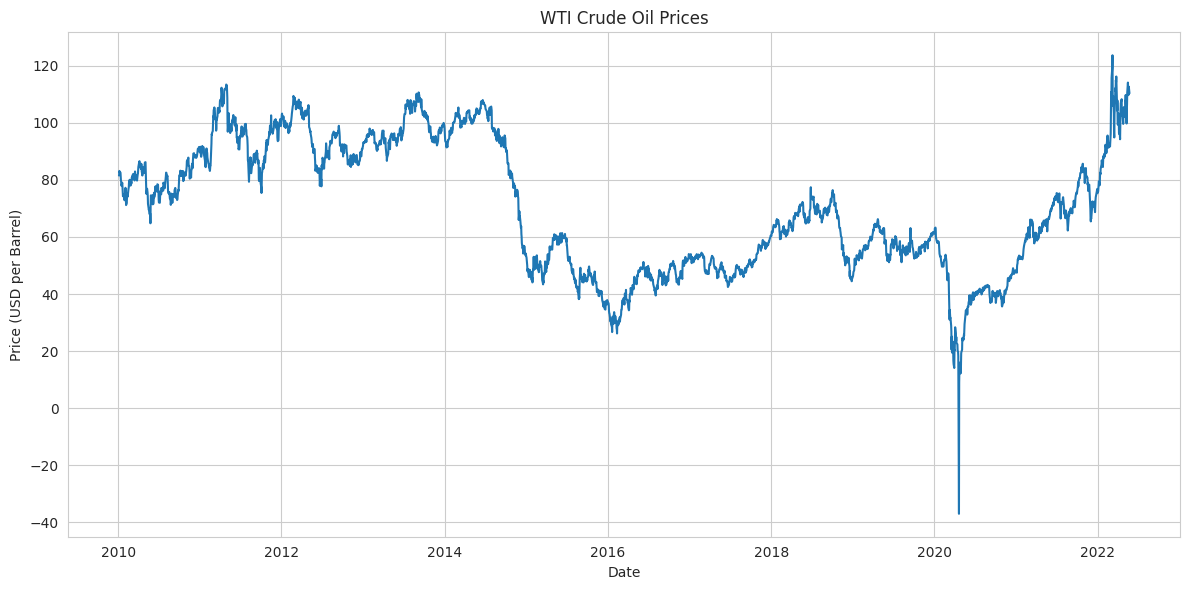


--------------------------------------------------

NASDAQ Composite Index Data:
            Index Value     High      Low  Total Market Value  \
Trade Date                                                      
2018-01-02      7006.90  7006.91  6924.08        1.067066e+13   
2018-01-03      7065.53  7069.15  7016.70        1.078842e+13   
2018-01-04      7077.91  7098.05  7072.38        1.080738e+13   
2018-01-05      7136.56  7137.04  7097.08        1.089695e+13   
2018-01-08      7157.39  7161.35  7124.09        1.092877e+13   

            Dividend Market Value  
Trade Date                         
2018-01-02           7.373659e+08  
2018-01-03           3.703689e+06  
2018-01-04           1.565174e+09  
2018-01-05           5.285305e+07  
2018-01-08           8.201618e+06  

--------------------------------------------------



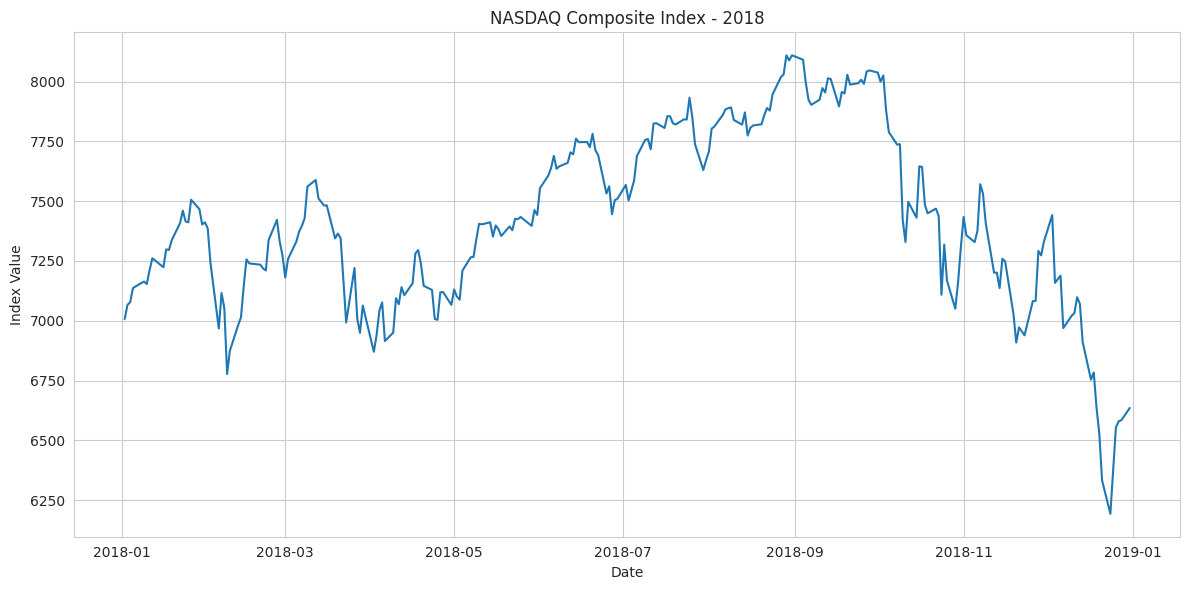


--------------------------------------------------

Multiple Dataset Data:
            WTI Crude Oil  NASDAQ Composite
2018-01-02          60.37           7006.90
2018-01-03          61.61           7065.53
2018-01-04          61.98           7077.91
2018-01-05          61.49           7136.56
2018-01-08          61.73           7157.39

--------------------------------------------------



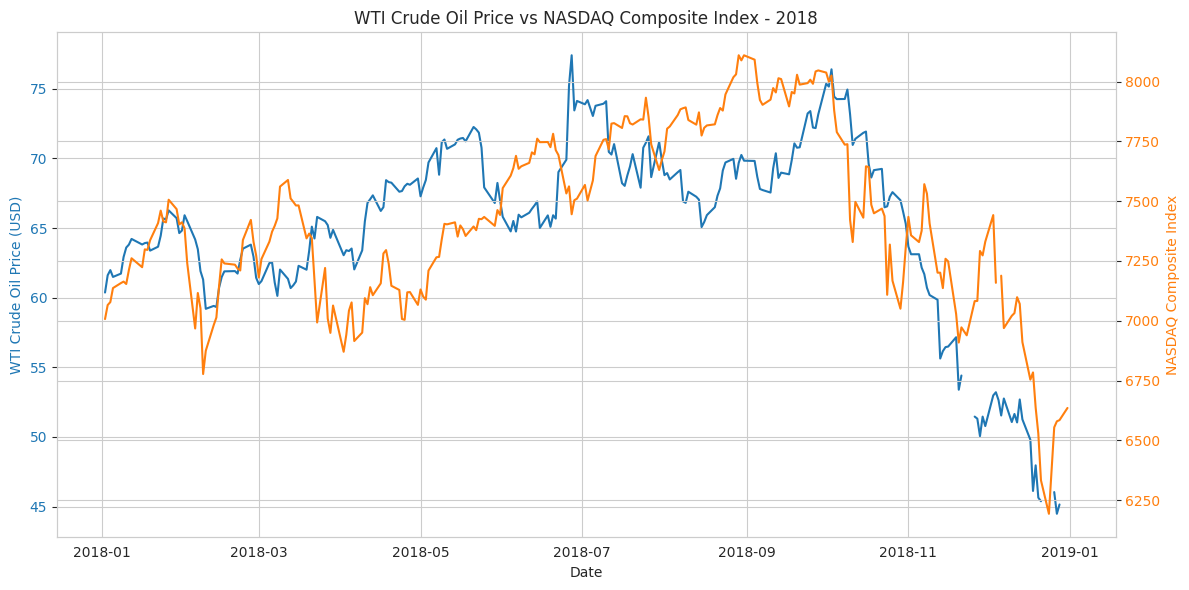


--------------------------------------------------

Correlation between WTI Crude Oil and NASDAQ Composite: 0.66


In [7]:

# Fetch data - let's get crude oil prices as an example
oil_data = quandl.get('FRED/DCOILWTICO', start_date='2010-01-01')

print("Crude Oil Price Data:")
print(oil_data.head())

print("\n" + "-"*50 + "\n")

# Plot the oil price data
plt.figure(figsize=(12, 6))
plt.plot(oil_data.index, oil_data['Value'])
plt.title('WTI Crude Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD per Barrel)')
plt.tight_layout()
plt.show()

print("\n" + "-"*50 + "\n")

# Fetch NASDAQ Composite Index data
nasdaq_data = quandl.get('NASDAQOMX/COMP', start_date='2018-01-01', end_date='2018-12-31')

print("NASDAQ Composite Index Data:")
print(nasdaq_data.head())

print("\n" + "-"*50 + "\n")

# Plot NASDAQ Composite Index
plt.figure(figsize=(12, 6))
plt.plot(nasdaq_data.index, nasdaq_data['Index Value'])
plt.title('NASDAQ Composite Index - 2018')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.tight_layout()
plt.show()

print("\n" + "-"*50 + "\n")

# Fetch multiple datasets at once
multi_data = pd.DataFrame({
    'WTI Crude Oil': quandl.get('FRED/DCOILWTICO', start_date='2018-01-01', end_date='2018-12-31')['Value'],
    'NASDAQ Composite': quandl.get('NASDAQOMX/COMP', start_date='2018-01-01', end_date='2018-12-31')['Index Value']
})

print("Multiple Dataset Data:")
print(multi_data.head())

print("\n" + "-"*50 + "\n")

# Plot multiple datasets
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('WTI Crude Oil Price (USD)', color='tab:blue')
ax1.plot(multi_data.index, multi_data['WTI Crude Oil'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('NASDAQ Composite Index', color='tab:orange')
ax2.plot(multi_data.index, multi_data['NASDAQ Composite'], color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('WTI Crude Oil Price vs NASDAQ Composite Index - 2018')
fig.tight_layout()
plt.show()

print("\n" + "-"*50 + "\n")

# Calculate and print correlation between WTI Crude Oil and NASDAQ Composite
correlation = multi_data['WTI Crude Oil'].corr(multi_data['NASDAQ Composite'])
print(f"Correlation between WTI Crude Oil and NASDAQ Composite: {correlation:.2f}")

# Quandl API Demo Explanation

This code demonstrates how to use the Quandl API to fetch, analyze, and visualize financial data. Here's a breakdown of its main components:

## Setup and Configuration

The code begins by importing necessary libraries and setting up the Quandl API with your key. It uses environment variables for secure API key storage.

## Fetching and Plotting Crude Oil Prices

Using the Federal Reserve Economic Data (FRED) dataset, the code retrieves WTI Crude Oil price data starting from January 1, 2010. It then displays the first few rows of this data and creates a line plot showing oil prices over time.

## Retrieving and Visualizing NASDAQ Composite Index

The code fetches the NASDAQ Composite Index data for the year 2018. It prints a sample of this data and generates a plot of the index values throughout the year.

## Working with Multiple Datasets

Demonstrating how to work with multiple datasets, the code simultaneously retrieves both WTI Crude Oil prices and the NASDAQ Composite Index for 2018. It then creates a dual-axis plot to visually compare these two datasets over the same time period.

## Correlation Analysis

The code calculates and displays the correlation coefficient between WTI Crude Oil prices and the NASDAQ Composite Index. This provides a measure of how these two variables move in relation to each other.

## Key Points to Remember

1. API key security is crucial when working with financial data APIs.
2. Quandl offers diverse datasets beyond stock prices and indices.
3. The Quandl API allows flexible data retrieval for single or multiple datasets.
4. When working with multiple datasets, it's important to ensure compatible date ranges and frequencies.
5. Data visualization can reveal insights not immediately apparent from raw numbers.
6. While correlation analysis is useful for understanding relationships between financial variables, it's important to remember that correlation does not imply causation.

This code serves as a foundation for fetching and analyzing financial data using the Quandl API. It can be expanded to work with different datasets or to perform more complex financial analyses.

## FRED

In [10]:
# Imports & Settings

# Suppress warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Import required libraries
import os  # For interacting with the operating system
from datetime import datetime  # For handling date and time
import pandas as pd  # For data manipulation and analysis
import pandas_datareader.data as web  # For accessing financial data from various sources
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import mplfinance as mpf  # For creating financial plots
import seaborn as sns  # For statistical data visualization

# Set the style for seaborn plots
sns.set_style('whitegrid')

In [11]:
start = datetime(2010, 1, 1)
end = datetime(2013, 1, 27)

gdp = web.DataReader('GDP', 'fred', start, end)
gdp.info()

inflation = web.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', start, end)
inflation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13 entries, 2010-01-01 to 2013-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     13 non-null     float64
dtypes: float64(1)
memory usage: 208.0 bytes
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2010-01-01 to 2013-01-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  37 non-null     float64
 1   CPILFESL  37 non-null     float64
dtypes: float64(2)
memory usage: 888.0 bytes


## Fama/French

In [12]:
from pandas_datareader.famafrench import get_available_datasets
get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [13]:
ds = web.DataReader('5_Industry_Portfolios', 'famafrench')
print(ds['DESCR'])

5 Industry Portfolios
---------------------

This file was created by CMPT_IND_RETS using the 202405 CRSP database. It contains value- and equal-weighted returns for 5 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2024 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (59 rows x 5 cols)
  1 : Average Equal Weighted Returns -- Monthly (59 rows x 5 cols)
  2 : Average Value Weighted Returns -- Annual (5 rows x 5 cols)
  3 : Average Equal Weighted Returns -- Annual (5 rows x 5 cols)
  4 : Number of Firms in Portfolios (59 rows x 5 cols)
  5 : Average Firm Size (59 rows x 5 cols)
  6 : Sum of BE / Sum of ME (5 rows x 5 cols)
  7 : Value-Weighted Average of BE/ME (5 rows x 5 cols)


## World Bank

In [14]:
from pandas_datareader import wb
gdp_variables = wb.search('gdp.*capita.*const')
gdp_variables.head()

,id,name,unit,source,sourceNote,sourceOrganization,topics
691,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
11026,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
11028,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
11030,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2021 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
11031,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [15]:
wb_data = wb.download(indicator='NY.GDP.PCAP.KD',
                      country=['US', 'CA', 'MX'],
                      start=1990,
                      end=2019)
wb_data.head()

NY.GDP.PCAP.KD
country year                
Canada  2019    45100.291490
        2018    44907.343684
        2017    44339.388669
        2016    43551.342602
        2015    43594.194105